## Check GPU detected or not.

In [1]:
import torch
print(torch.__version__)  # Should print PyTorch version
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Should show NVIDIA RTX 3050

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe
2.5.1+cu121
True
NVIDIA GeForce RTX 3050


## Train License Type Detection Model using YOLOv11

In [12]:
from ultralytics import YOLO
import torch

# Ensure CUDA is used
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")  # Should print "cuda"

# Load YOLO model onto GPU
model = YOLO("yolo11n.pt").to(device)

# Train the model on GPU
results = model.train(data="Self_Dataset\\data.yaml", epochs=100, imgsz=640, device=device)

Using device: cuda
New https://pypi.org/project/ultralytics/8.3.109 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=Self_Dataset\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

train: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\Self_Dataset\train\labels... 8795 images, 714 backgrounds, 0 corrupt:  97%|█████████▋| 8795/9024 [00:06<00:00, 1408.41it/s]


KeyboardInterrupt: 

# Check Model's Accuracy

In [ ]:
model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train3\\weights\\best.pt")
metrics = model.val(data="Self_Dataset/data.yaml")  # Returns a dictionary of metrics

print(metrics)  # Optional to inspect in code

Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\Self_Dataset\valid\labels.cache... 324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  8.09it/s]


                   all        324        731      0.866      0.833      0.895       0.76
             Ambulance         43         47      0.997          1      0.995      0.951
                  Bike         41         50      0.742       0.74        0.8      0.622
                   Bus         35         37      0.923      0.811      0.913      0.783
                   Car         82        142      0.812      0.915      0.916       0.77
         License_Plate        163        260      0.877      0.767      0.848       0.65
              Rickshaw         87        121      0.892      0.909       0.97      0.874
               Tractor         23         23      0.858      0.789       0.85      0.662
                 Truck         40         51      0.824      0.734      0.871      0.769
Speed: 0.6ms preprocess, 4.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\val4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array

# Visualize confusion matrix

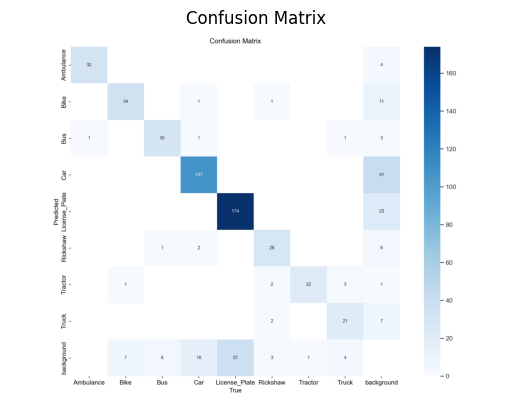

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("runs/detect/val/confusion_matrix.png")
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix")
plt.show()



image 1/1 c:\Users\ADMIN\Desktop\Project_ANPR\Test_images\image_19.jpg: 640x640 1 Bike, 4 Cars, 5.4ms
Speed: 1.6ms preprocess, 5.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


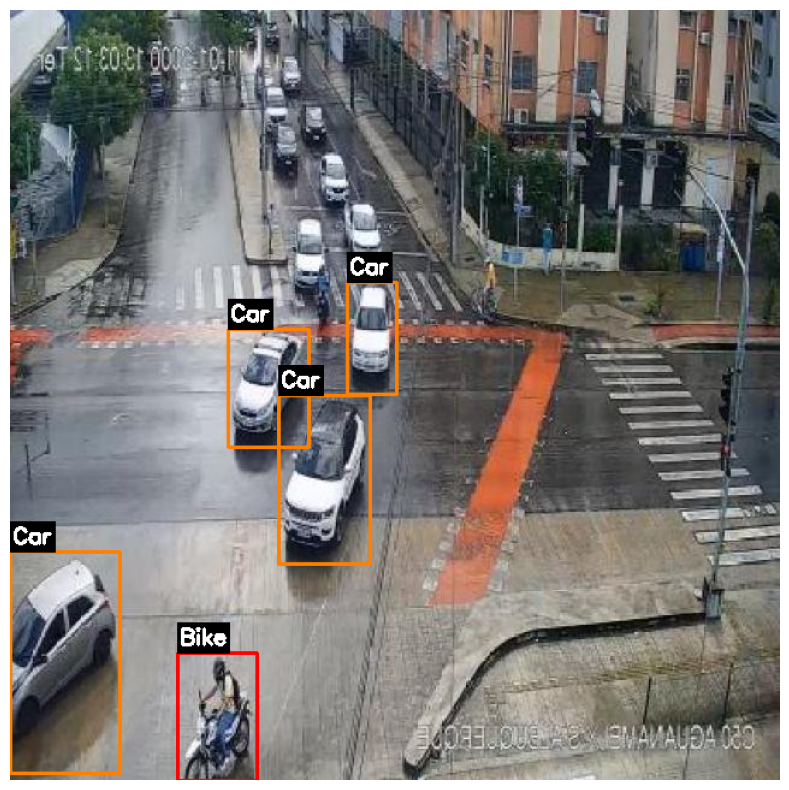

In [16]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train3\\weights\\best.pt")

# Load image
image_path = "Test_images\image_19.jpg"
results = model(image_path)

# Load and convert image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Optional: define colors for different classes (only one here, but scalable)
COLORS = [(0, 255, 0), (255, 0, 0), (0, 128, 255), (255, 128, 0)]

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        label = f"{model.names[cls]}"
        #{conf:.2f}"

        # Draw bounding box
        color = COLORS[cls % len(COLORS)]
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Create a filled rectangle for the label background
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
        label_bg_color = (0, 0, 0)
        cv2.rectangle(image, (x1, y1 - 25), (x1 + w + 4, y1), label_bg_color, -1)

        # Put label text above the box
        cv2.putText(image, label, (x1 + 2, y1 - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# Show the result
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.tight_layout()
plt.show()



image 1/1 c:\Users\ADMIN\Desktop\Project_ANPR\Test_images\image_20.jpg: 480x640 4 Cars, 3 License_Plates, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


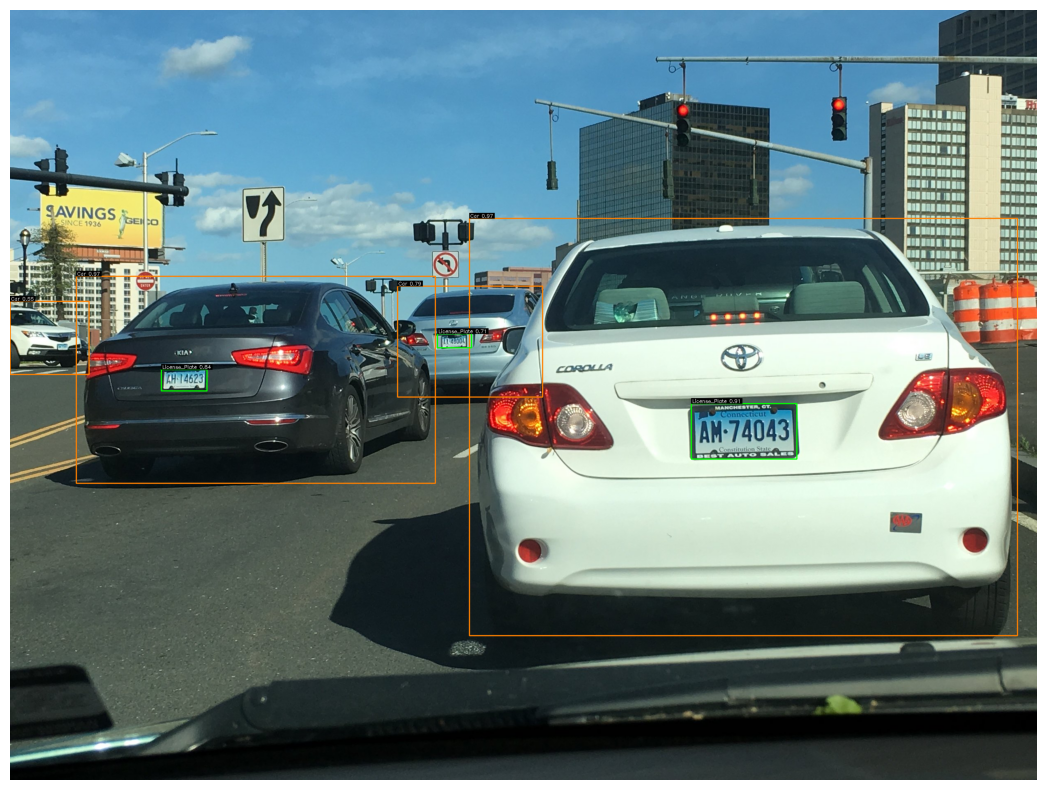

In [11]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train3\\weights\\best.pt")

# Load image
image_path = "Test_images/image_20.jpg"
results = model(image_path)

# Load and convert image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Optional: define colors for different classes (only one here, but scalable)
COLORS = [(0, 255, 0), (255, 0, 0), (0, 128, 255), (255, 128, 0)]

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        label = f"{model.names[cls]} {conf:.2f}"

        # Draw bounding box
        color = COLORS[cls % len(COLORS)]
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Create a filled rectangle for the label background
               # Create a filled rectangle for the label background
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)
        label_bg_color = (0, 0, 0)
        padding = 4  # slight padding around the text
        cv2.rectangle(image, (x1, y1 - h - padding), (x1 + w + padding, y1), label_bg_color, -1)

        # Put label text above the box
        cv2.putText(image, label, (x1 + 2, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)


# Show the result
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.tight_layout()
plt.show()
